# Predicting commonly misdiagnosed diseases using Image Classification 

# Lung Cancer vs Pneumonia

# 1. Install Dependencies and Setup

In [ ]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
alembic                       1.11.1
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.34.60
botocore                      1.34.60
branca                        0.5.0
cachetools                    5.2.0
catalogue                     2.0.8
certifi                       2022.9.24
cffi 

In [ ]:
import tensorflow as tf 
import os

2024-04-20 21:47:46.399040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 21:47:46.568494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-20 21:47:46.568519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-20 21:47:46.600914: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 21:47:47.272972: W tensorflow/stream_executor/pla

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-04-20 21:47:48.384852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-20 21:47:48.385541: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-20 21:47:48.385567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import imghdr

In [ ]:
data_dir = '/work/Cancer'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer/Lung Cancer/Lung cancer01.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer02.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer03.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer04.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer05.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer06.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer07.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer08.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer09.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer10.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer11.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer12.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer13.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer14.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer15.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer17.jpeg
Issue with image /work/C

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer')

Found 62 files belonging to 2 classes.
2024-04-20 21:47:53.816682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

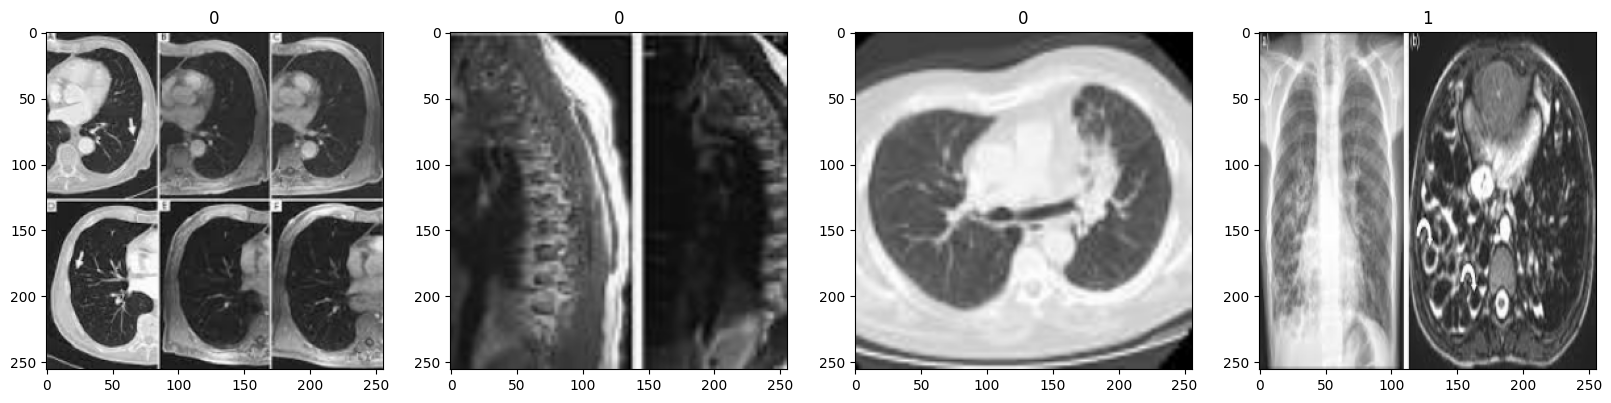

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.00539216, 0.00539216, 0.00539216],
          [0.02990196, 0.02990196, 0.02990196],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.03134191, 0.03134191, 0.03134191],
          [0.0365603 , 0.0365603 , 0.0365603 ],
          [0.06028023, 0.06028023, 0.06028023],
          ...,
          [0.02713719, 0.02713719, 0.02713719],
          [0.02726883, 0.02726883, 0.02726883],
          [0.02729779, 0.02729779, 0.02729779]],
 
         [[0.17380515, 0.17380515, 0.17380515],
          [0.17823367, 0.17823367, 0.17823367],
          [0.1983633 , 0.1983633 , 0.1983633 ],
          ...,
          [0.15048805, 0.15048805, 0.15048805],
          [0.15121807, 0.15121807, 0.15121807],
          [0.15137868, 0.15137868, 0.15137868]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [ ]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [ ]:
train_size

43

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 3.1386 - accuracy: 0.5484
Epoch 2/20
2/2 [==============================] - 12s 3s/step - loss: 1.5204 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 13s 3s/step - loss: 0.7631 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 12s 3s/step - loss: 0.7336 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 12s 3s/step - loss: 0.6201 - accuracy: 0.6452
Epoch 6/20
2/2 [==============================] - 12s 3s/step - loss: 0.5557 - accuracy: 0.9355
Epoch 7/20
2/2 [==============================] - 12s 3s/step - loss: 0.4959 - accuracy: 0.9032
Epoch 8/20
2/2 [==============================] - 12s 3s/step - loss: 0.4469 - accuracy: 0.8548
Epoch 9/20
2/2 [==============================] - 12s 3s/step - loss: 0.3849 - accuracy: 0.8226
Epoch 10/20
2/2 [==============================] - 12s 3s/step - loss: 0.2749 - accuracy: 0.9516
Epoch 11/20
2/2 [======================

# 8. Plot Performance

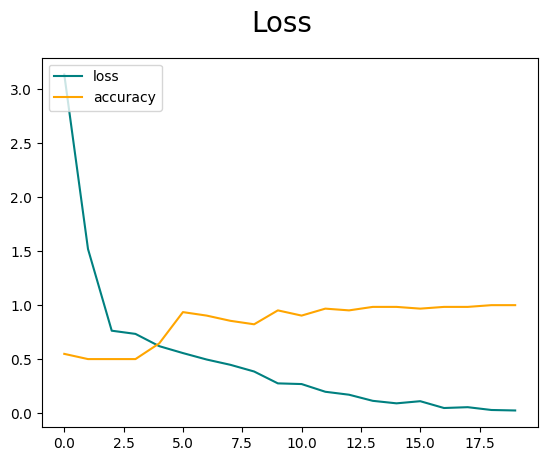

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
import pandas as pd
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])


results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

print(results)

2/2 [==============================] - 12s 3s/step - loss: 5.2421e-04 - accuracy: 1.0000
    Train Accuracy  Train Loss  Epochs
0              1.0    0.023951       1
1              1.0    0.014498       2
2              1.0    0.009258       3
3              1.0    0.008759       4
4              1.0    0.006942       5
5              1.0    0.004487       6
6              1.0    0.002693       7
7              1.0    0.002795       8
8              1.0    0.002636       9
9              1.0    0.001961      10
10             1.0    0.001386      11
11             1.0    0.001113      12
12             1.0    0.001088      13
13             1.0    0.001056      14
14             1.0    0.000974      15
15             1.0    0.000843      16
16             1.0    0.000685      17
17             1.0    0.000633      18
18             1.0    0.000560      19
19             1.0    0.000524      20


# 10. Test

In [ ]:
from PIL import Image

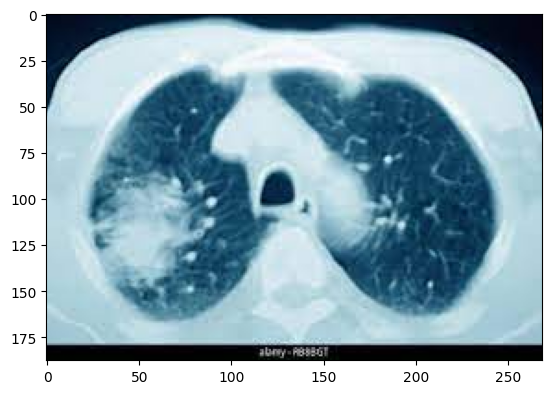

In [ ]:
img = Image.open('/work/Cancer/Lung Cancer/Lung cancer29.jpeg')
plt.imshow(img)
plt.show()


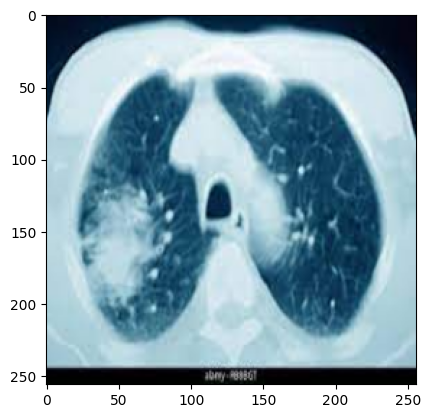

In [ ]:
# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))


1/1 [==============================] - 0s 171ms/step


In [ ]:
predicted_class = np.argmax(yhat)

test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.00011227263
Test Loss: 9.094581


In [ ]:
if yhat < 0.5: 
    print(f'Predicted class is Lung Cancer')
else:
    print(f'Predicted class is Pneumonia')

Predicted class is Lung Cancer


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>